* InvoiceNo: 각 송장을 식별하는 고유 ID
* StockCode: 재고가 있는 각 품목의 고유 ID
* Description: 각 항목에 대한 간단한 설명
* Quantity: 구입한 품목의 수
* UnitPrice: 각 항목의 가격
* CustomerID: 고객별 고유 ID
* Country: 고객이 살고 있는 국가

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('online_retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240007 entries, 0 to 240006
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    240007 non-null  object 
 1   StockCode    240007 non-null  object 
 2   Description  239106 non-null  object 
 3   Quantity     240007 non-null  int64  
 4   InvoiceDate  240007 non-null  object 
 5   UnitPrice    240007 non-null  float64
 6   CustomerID   172782 non-null  float64
 7   Country      240007 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 14.6+ MB


In [141]:
df.isna().sum()

InvoiceNo          0
StockCode          0
Description      901
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     67225
Country            0
dtype: int64

In [142]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,240007,240007,239106,240007.000000,240007,240007.000000,172782.000000,240007
unique,12468,3645,3617,NaN,11240,NaN,NaN,38
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,12/6/10 16:57,NaN,NaN,United Kingdom
freq,675,1294,1319,NaN,675,NaN,NaN,220279
mean,NaN,NaN,NaN,9.277646,NaN,5.124265,15274.819941,NaN
std,NaN,NaN,NaN,223.061608,NaN,119.992279,1725.093177,NaN
min,NaN,NaN,NaN,-74215.000000,NaN,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13842.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.100000,15132.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.210000,16814.000000,NaN


In [143]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df = df[df['CustomerID'].notnull()]
df['CustomerID'] - df['CustomerID'].astype(int)
df.info()
print(df.isnull().sum())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 168662 entries, 0 to 240006
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    168662 non-null  object 
 1   StockCode    168662 non-null  object 
 2   Description  168662 non-null  object 
 3   Quantity     168662 non-null  int64  
 4   InvoiceDate  168662 non-null  object 
 5   UnitPrice    168662 non-null  float64
 6   CustomerID   168662 non-null  float64
 7   Country      168662 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 11.6+ MB
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
(168662, 8)


In [144]:
df = df.drop_duplicates()
print(df.shape)

(166733, 8)


In [145]:
# 고객의 주문 횟수, 주문 총액, 그리고 마지막 주문 후 며칠이 지났는지에 대한 정보를 추출
df['SaleAmount'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [146]:
# 고객별 마지막 주문일, 주문 횟수, 주문 총액 구하기
# 고객의 마지막 주문 후 경과일(Elapsed Days), 주문횟수(Freq), 주문 총액(Total Amount) 구하기
aggregations = {
    'InvoiceNo': 'count',
    'SaleAmount': 'sum',
    'InvoiceDate': 'max'
}
customer_df = df.groupby('CustomerID').agg(aggregations)
customer_df = customer_df.reset_index()

customer_df

,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346.0,1,77183.60,1/18/11 10:01
1,12347.0,102,2205.95,6/9/11 13:01
2,12348.0,28,1487.24,4/5/11 10:47
3,12350.0,17,334.40,2/2/11 16:01
4,12352.0,38,1561.81,3/22/11 16:08
...,...,...,...,...
2926,18273.0,1,51.00,3/27/11 11:22
2927,18280.0,10,180.60,3/7/11 9:52
2928,18281.0,7,80.82,6/12/11 10:53
2929,18283.0,322,812.04,6/23/11 19:20


In [147]:
customer_df = customer_df.rename(columns={
    'InvoiceNo': 'Freq',
    'InvoiceDate': 'ElapsedDays'
})
customer_df

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346.0,1,77183.60,1/18/11 10:01
1,12347.0,102,2205.95,6/9/11 13:01
2,12348.0,28,1487.24,4/5/11 10:47
3,12350.0,17,334.40,2/2/11 16:01
4,12352.0,38,1561.81,3/22/11 16:08
...,...,...,...,...
2926,18273.0,1,51.00,3/27/11 11:22
2927,18280.0,10,180.60,3/7/11 9:52
2928,18281.0,7,80.82,6/12/11 10:53
2929,18283.0,322,812.04,6/23/11 19:20


In [148]:
customer_df['ElapsedDays'] = pd.to_datetime(customer_df['ElapsedDays'])
customer_df

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22620\176371039.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['ElapsedDays'] = pd.to_datetime(customer_df['ElapsedDays'])


,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346.0,1,77183.60,2011-01-18 10:01:00
1,12347.0,102,2205.95,2011-06-09 13:01:00
2,12348.0,28,1487.24,2011-04-05 10:47:00
3,12350.0,17,334.40,2011-02-02 16:01:00
4,12352.0,38,1561.81,2011-03-22 16:08:00
...,...,...,...,...
2926,18273.0,1,51.00,2011-03-27 11:22:00
2927,18280.0,10,180.60,2011-03-07 09:52:00
2928,18281.0,7,80.82,2011-06-12 10:53:00
2929,18283.0,322,812.04,2011-06-23 19:20:00


In [149]:
import datetime
customer_df['ElapsedDays'] = datetime.datetime(2011, 9, 11) - customer_df['ElapsedDays']
customer_df

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346.0,1,77183.60,235 days 13:59:00
1,12347.0,102,2205.95,93 days 10:59:00
2,12348.0,28,1487.24,158 days 13:13:00
3,12350.0,17,334.40,220 days 07:59:00
4,12352.0,38,1561.81,172 days 07:52:00
...,...,...,...,...
2926,18273.0,1,51.00,167 days 12:38:00
2927,18280.0,10,180.60,187 days 14:08:00
2928,18281.0,7,80.82,90 days 13:07:00
2929,18283.0,322,812.04,79 days 04:40:00


In [150]:
customer_df['ElapsedDays'] = customer_df['ElapsedDays'].dt.days + 1
customer_df

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346.0,1,77183.60,236
1,12347.0,102,2205.95,94
2,12348.0,28,1487.24,159
3,12350.0,17,334.40,221
4,12352.0,38,1561.81,173
...,...,...,...,...
2926,18273.0,1,51.00,168
2927,18280.0,10,180.60,188
2928,18281.0,7,80.82,91
2929,18283.0,322,812.04,80


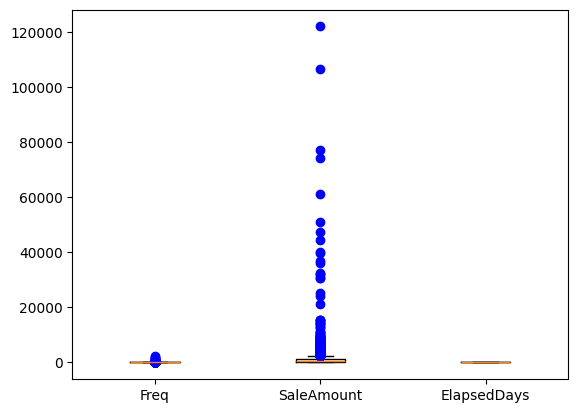

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq'], customer_df['SaleAmount'], customer_df['ElapsedDays']], sym='bo')
plt.xticks([1, 2, 3], ['Freq', 'SaleAmount', 'ElapsedDays'])

plt.show()

In [152]:
import numpy as np
customer_df['Freq_log'] = np.log(customer_df['Freq'])
customer_df['SaleAmount_log'] = np.log(customer_df['SaleAmount'])
customer_df['ElapsedDays_log'] = np.log(customer_df['ElapsedDays'])
customer_df

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log
0,12346.0,1,77183.60,236,0.000000,11.253942,5.463832
1,12347.0,102,2205.95,94,4.624973,7.698914,4.543295
2,12348.0,28,1487.24,159,3.332205,7.304677,5.068904
3,12350.0,17,334.40,221,2.833213,5.812338,5.398163
4,12352.0,38,1561.81,173,3.637586,7.353601,5.153292
...,...,...,...,...,...,...,...
2926,18273.0,1,51.00,168,0.000000,3.931826,5.123964
2927,18280.0,10,180.60,188,2.302585,5.196285,5.236442
2928,18281.0,7,80.82,91,1.945910,4.392224,4.510860
2929,18283.0,322,812.04,80,5.774552,6.699550,4.382027


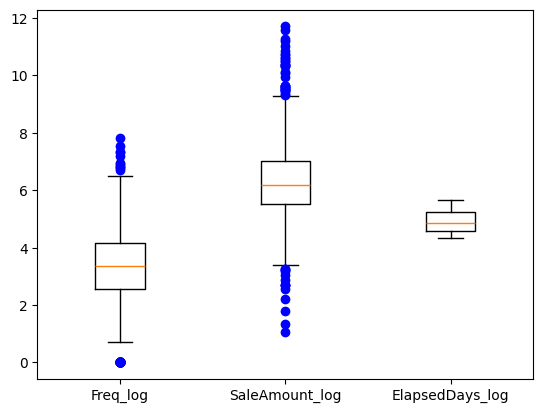

In [153]:
fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq_log'], customer_df['SaleAmount_log'], customer_df['ElapsedDays_log']], sym='bo')
plt.xticks([1, 2, 3], ['Freq_log', 'SaleAmount_log', 'ElapsedDays_log'])
plt.show()

In [154]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
X_features = customer_df[['Freq_log', 'SaleAmount_log', 'ElapsedDays_log']].values

In [155]:
from sklearn.preprocessing import StandardScaler
X_features_scaled = StandardScaler().fit_transform(X_features)
X_features_scaled

array([[-2.71325532e+00,  4.24694719e+00,  1.41653906e+00],
       [ 1.05307025e+00,  1.20396175e+00, -1.00797237e+00],
       [ 3.10267920e-04,  8.66508773e-01,  3.76378302e-01],
       ...,
       [-1.12861224e+00, -1.62645326e+00, -1.09340044e+00],
       [ 1.98922446e+00,  3.48539718e-01, -1.43272060e+00],
       [ 2.88867246e-02,  2.97774212e-01, -5.46519648e-01]],
      shape=(2931, 3))

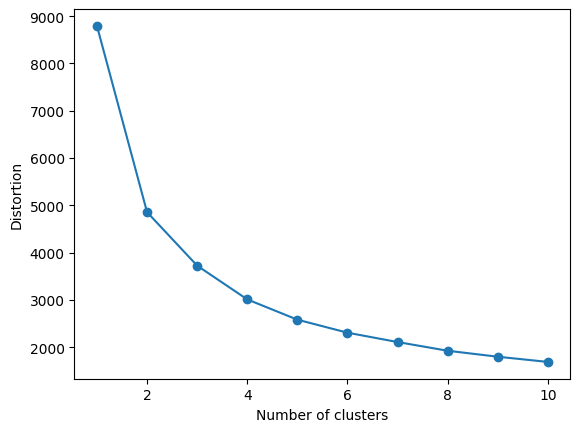

In [156]:
distortions = []

for i in range(1, 11):
    kmeans_i = KMeans(n_clusters=i, random_state=11) 
    kmeans_i.fit(X_features_scaled) 
    distortions.append(kmeans_i.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

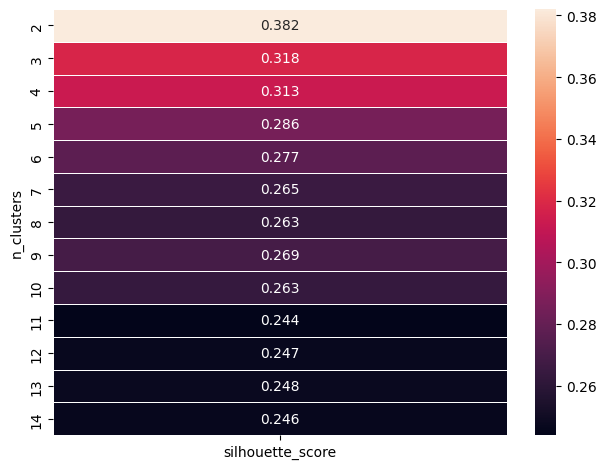

In [157]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300):
    clusters_range = range(2,15)
    results = []

    for i in clusters_range:
        clusterer = KMeans(n_clusters=i)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()

visualize_silhouette_layer(X_features_scaled)

In [158]:
kmeans = KMeans(n_clusters=2, random_state=11)
Y_labels = kmeans.fit_predict(X_features_scaled)
Y_labels

array([1, 1, 1, ..., 0, 1, 1], shape=(2931,), dtype=int32)

In [159]:
customer_df['ClusterLabel'] = Y_labels
customer_df

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346.0,1,77183.60,236,0.000000,11.253942,5.463832,1
1,12347.0,102,2205.95,94,4.624973,7.698914,4.543295,1
2,12348.0,28,1487.24,159,3.332205,7.304677,5.068904,1
3,12350.0,17,334.40,221,2.833213,5.812338,5.398163,0
4,12352.0,38,1561.81,173,3.637586,7.353601,5.153292,1
...,...,...,...,...,...,...,...,...
2926,18273.0,1,51.00,168,0.000000,3.931826,5.123964,0
2927,18280.0,10,180.60,188,2.302585,5.196285,5.236442,0
2928,18281.0,7,80.82,91,1.945910,4.392224,4.510860,0
2929,18283.0,322,812.04,80,5.774552,6.699550,4.382027,1
